## Evidencia 1 - Pregunta 5

Se presenta a continuación la actividad correspondiente a la pregunta 5.
Considera un punto inicial y encuentra el valor mínimo estimado para la que dicha función converge.

Para este caso se usará la función obtenida en un documento que contiene la explicación de a que se refiere la función tomado del sitio [academia.edu](https://www.academia.edu/36970315/Colecci%C3%B3n_de_ejercicios_resueltos_de_Matem%C3%A1ticas_Aplicadas_a_la_Biolog%C3%ADa)

La población de una especie sigue la siguiente función:
$P(t) = 1 + \frac{(t - a)^2}{1 + (t - a)^2}$
t ≥ 0, a > 0,
donde P(t) es el número de individuos de la población (medida en miles) y t el tiempo (medido en meses).

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as npl
from matplotlib.gridspec import GridSpec
from sympy import *

Declaramos la variable de la expresión de la función y sus símbolos

In [13]:
t, a = symbols('t a')
funcion = 1 + ((t - a)**2)/(1 + (t - a)**2)
print("La función es:\n")
funcion

La función es:



(-a + t)**2/((-a + t)**2 + 1) + 1

Usamos lambdify para transformar la función a una función lambda

In [14]:
funcion_lambda = lambdify((t, a), funcion)

Representando la función en un gráfico.
Iniciamos generando un conjunto de datos pra graficar.

In [15]:
l = 4
n = 150
linspace = np.linspace(-l, l, n)
X, Y = np.meshgrid(linspace, linspace)
Z = funcion_lambda(X, Y)

Graficamos los datos

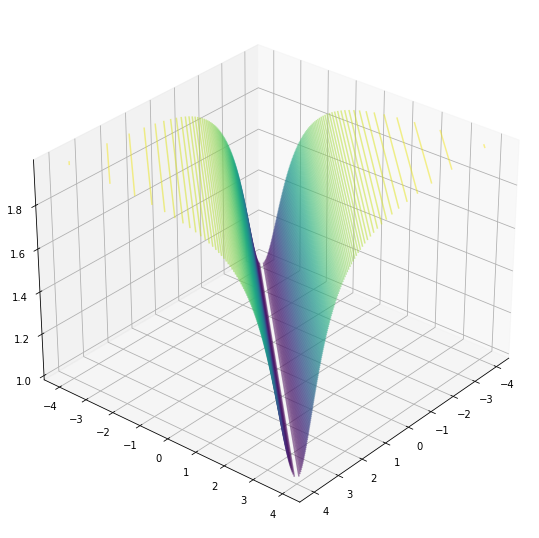

In [30]:
figure = plt.figure(figsize=(15, 16), tight_layout=True)
grids = GridSpec(2, 2)
ax = figure.add_subplot(grids[1, 0], projection='3d')
ax.contour3D(X, Y, Z, n, alpha=0.5)
ax.view_init(elev=30, azim=40)

In [31]:
funciondt = funcion.diff(t)
funciondt_lambda = lambdify((t, a), funciondt)
funcionda = funcion.diff(a)
funcionda_lambda = lambdify((t, a), funcionda)
func_grad_array = [funciondt, funcionda]
func_grad_lambda = lambdify('t, a', func_grad_array)

Implementando la función de gradiente descendiente de los ejercicios realizados en las clases

In [32]:
def gradientDescent(gradiente, punto_inicio, tamaño_paso = .08, precision = .01, max_iter = 3000, initError = 10):
    # configuracion inicial
    x,y = punto_inicio.astype(float)
    currIter, iterCoords = 0, [np.hstack([x,y])]
    error = initError
    currX = np.array([x,y])

    # inicio de las iteraciones

    while npl.norm(error) > precision and currIter<max_iter:
        currIter+=1 # se incrementa el contador
        prevX = currX.copy() # registra el ultimo valor de error

        # Gradient descent equation
        currX -= tamaño_paso * np.array(gradiente(x,y)) # New X = (last) minus (step size * function gradient(last)).
        x,y = currX[0].copy(), currX[1].copy() # Update X.
        # Gradient descent equation

        error = currX - prevX # Error based on how much movement new X made based on gamma and gradient.
        iterCoords.append(np.hstack([x,y])) # Track X for plotting.

    return currIter, currX, np.vstack(iterCoords)

Definiendo el punto inicial

In [82]:
punto_inicial = np.vstack([-2, 1])

Graficando el punto inicial

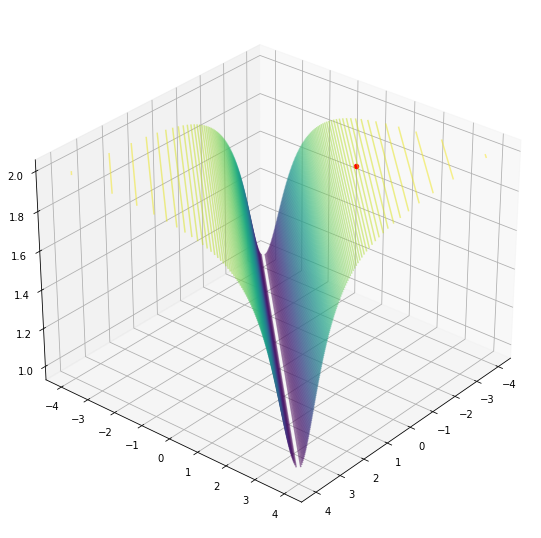

In [83]:
figure = plt.figure(figsize=(15, 16), tight_layout=True)
grids = GridSpec(2, 2)
ax = figure.add_subplot(grids[1, 0], projection='3d')
ax.contour3D(X, Y, Z, n, alpha=0.5)
ax.scatter(punto_inicial[0], punto_inicial[1], funcion_lambda(*punto_inicial), color='red')
ax.view_init(elev=30, azim=40)

Usando la función de gradiente descendiente calculamos el valor mínimo donde la función converge

In [84]:
total_pasos, coord_min, iterCoords = gradientDescent(func_grad_lambda, punto_inicial, tamaño_paso=0.01)
print("Los pasos totales fueron:\n", total_pasos)
print("La coordenada mínima fue:\n", coord_min)
print("Las coordenadas de los pasos fueron:\n", iterCoords)

Los pasos totales fueron:
 1
La coordenada mínima fue:
 [[-1.9994]
 [ 0.9994]]
Las coordenadas de los pasos fueron:
 [[-2.      1.    ]
 [-1.9994  0.9994]]
